In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
# ダミーデータを生成する
from sklearn.datasets import make_blobs

In [6]:
# centers = 4（目的変数の数)
X,y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

In [9]:
y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3,
       3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 3, 1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3,
       0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3,
       2, 0, 3, 2, 3, 3, 1, 0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2,
       3, 3, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2,
       2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1, 0, 3, 3, 0, 1, 2, 0, 0, 0, 2,
       3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3, 0, 3,

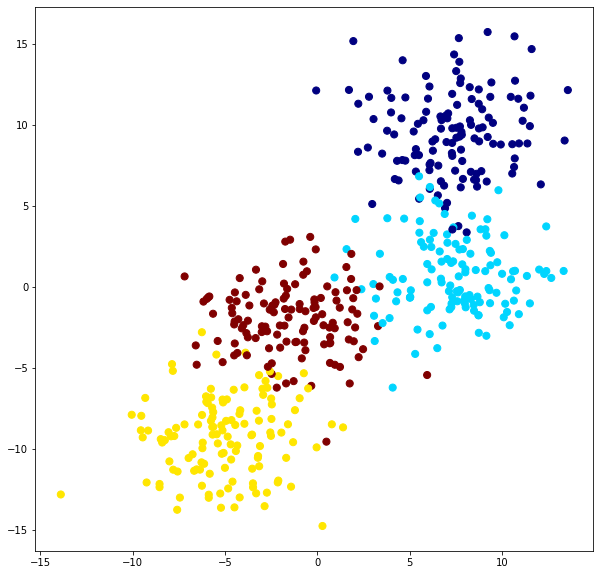

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='jet')

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# ノードごとに色をつける
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [17]:
# 2段階まで分類
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

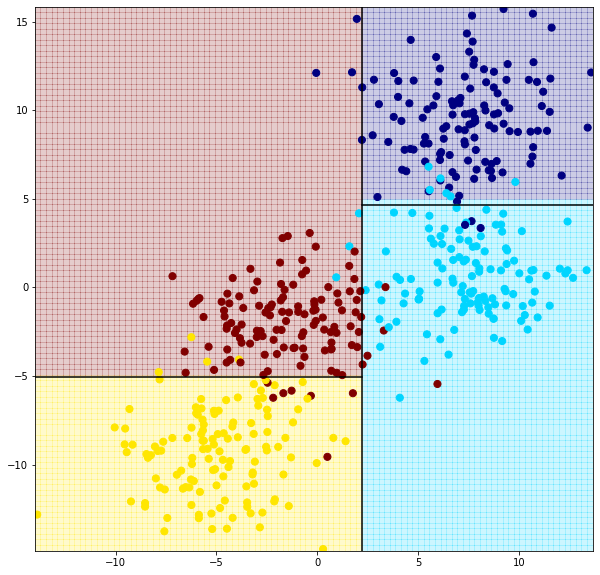

In [18]:
visualize_tree(clf, X,y)
# 縦線が最初の分割

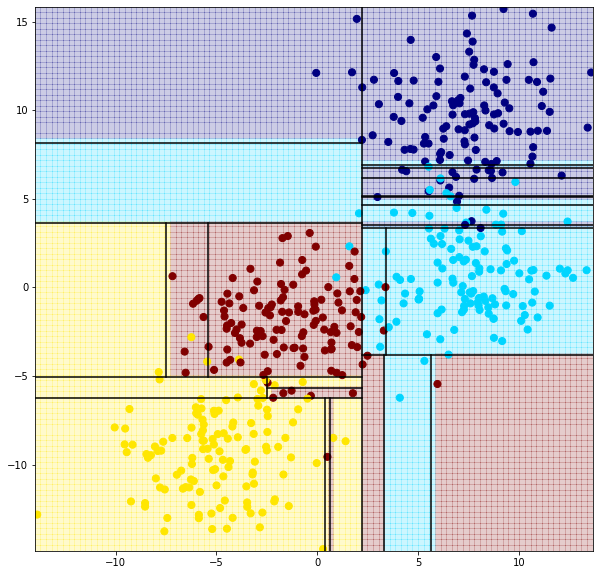

In [24]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
visualize_tree(clf, X,y)
# 細かすぎると過学習になり精度が落ちる

## ランダムフォレスト

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# n_estimater 決定木の数
clf = RandomForestClassifier(n_estimators=100, random_state=0)

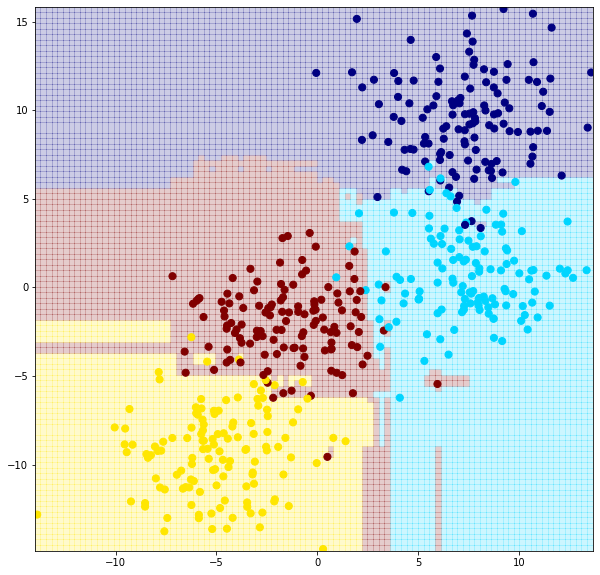

In [26]:
# boundary=境界
visualize_tree(clf, X, y, boundaries=False)

In [27]:
# 一般的に決定木よりも性能がいい
# 過学習がなくなる訳はではない（水色の中の赤の範囲など)

## 回帰でのランダムフォレスト

<ErrorbarContainer object of 3 artists>

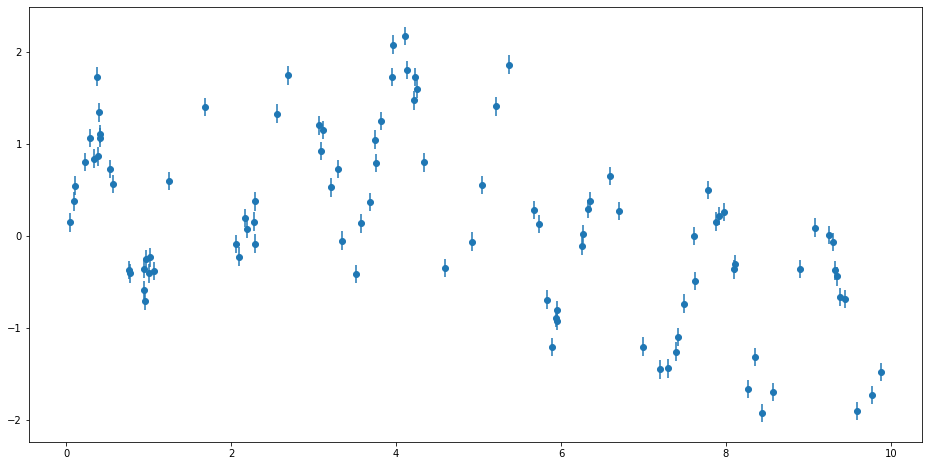

In [29]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# Plotします。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

In [30]:
# テスト用データ
xfit = np.linspace(0,10, 1000)

In [32]:
rfr = RandomForestRegressor(100)

In [33]:
# モデル
rfr.fit(x[:, None],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
# 予測
yfit = rfr.predict(xfit[:, None])

In [35]:
yfit

array([ 0.2919496 ,  0.2919496 ,  0.2919496 ,  0.2919496 ,  0.2919496 ,
        0.2919496 ,  0.2919496 ,  0.37643637,  0.46033323,  0.46033323,
        0.51852974,  0.51852974,  0.51852974,  0.51852974,  0.5382567 ,
        0.5382567 ,  0.61122456,  0.72761413,  0.72761413,  0.74825599,
        0.82579039,  0.82579039,  0.83045857,  0.87832932,  0.87832932,
        0.93770884,  1.02053747,  1.02053747,  1.02053747,  1.02843248,
        1.05631849,  1.05872459,  0.97769915,  1.05147553,  1.04750179,
        1.05310844,  1.49015835,  1.50881479,  1.09378806,  1.20567348,
        1.26531487,  1.11699346,  1.11699346,  1.11699346,  1.11699346,
        1.09688187,  1.09551989,  0.8975971 ,  0.86652371,  0.72837146,
        0.72837146,  0.72837146,  0.72837146,  0.72837146,  0.72837146,
        0.67342163,  0.67342163,  0.67342163,  0.63916482,  0.5017952 ,
        0.5017952 ,  0.5017952 ,  0.5017952 ,  0.5017952 ,  0.5017952 ,
        0.26969476,  0.26969476, -0.27878563, -0.27878563, -0.27

In [36]:
ytrue = sin_model(xfit,0)

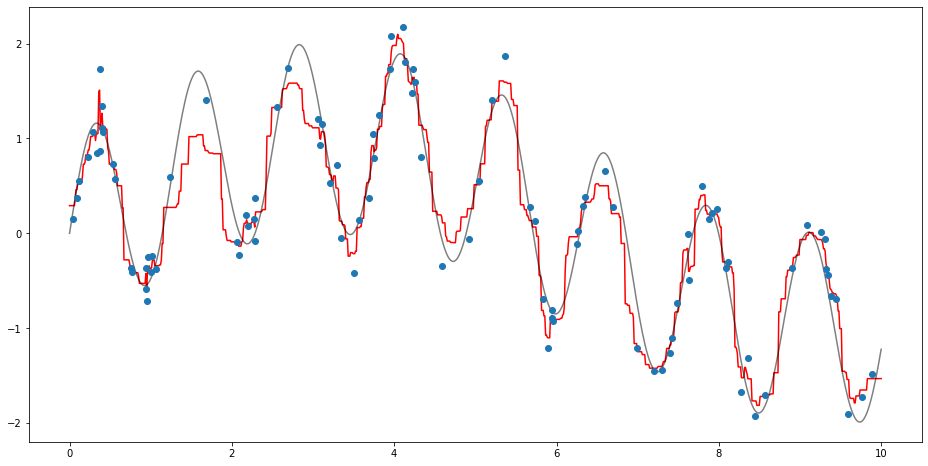

In [42]:
plt.figure(figsize=(16,8))

# 元の値
plt.errorbar(x, y, fmt='o')
# ランダムフォレストに回帰で予測された値
plt.plot(xfit,yfit,'-r')
# 元データ
plt.plot(xfit, ytrue, 'k', alpha=0.5)